**Instructions**

* Read and complete all exercises below in the provided `.rmd` notebook 
[click here to download the notebook for the assignment](HW-2.rmd.zip)

**Submission:**

* You need to upload ONE document to Canvas when you are done. 
* A PDF (or HTML) of the completed form of this notebook
* The final uploaded version should NOT have any code-errors present. 
* All outputs must be visible in the uploaded version, including code-cell outputs, images, graphs, etc

**Optional**: 

* You can actually work in `R` now inside VS-code using the `.ipynb` format
* Its quite easy to get working: [click here for instructions](https://www.practicaldatascience.org/html/jupyter_r_notebooks.html)
* There are a few benefits to this 
  * (1) You can work 100% in VS-Code (for both R and Python), no need to switch between VSC and R-studio
  * (2) You can work through your cells one at a time and see the incremental progress, similar to using `.ipynb` with python or `rmd` in R-studio.
* With Quarto's `convert` command, you can re-format and jump between the different file-formats. For example, 
* `quarto convert HW-2.rmd` will convert the file to `HW-2.ipynb`
* `quarto convert HW-2.ipynb` will convert the file to `HW-2.qmd`, which can be renamed `HW-2.rmd` or just opened in R-studio like any other `rmd` file, just like normal.
* `quarto render HW-2.ipynb` will render the notebook (either R or Python) into an aesthetically pleasing output.

In [105]:
#knitr::opts_chunk$set(include = FALSE) # for making prompts
knitr::opts_chunk$set(echo = TRUE) # for making solutions
library(tidyverse)
library(modeldata)
library(leaps)
library(caret)
library(corrplot)

## HW-2.1: Heating values
Use best subset selection methods to determine the best heating values

For bioenergy production, the heating value is a measure of the amount of heat released during combustion. The Higher heating value (HHV) is a particular method for determining the heat released during combustion. The higher HHV the more energy released for a given amount of material. You will use the `biomass` dataset from the `modeldata` package. Run a `?biomass` after importing the data to read about the domain. The response variable is HHV and the predictor variables are the percentages of different elements. Do not include the sample and dataset variables in your analysis.

**HW-2.1.a**
Create scatter-plots of the response and predictor variables and comment on your findings.

In [106]:
# IMPORT 
data(biomass)

# EXPLORE DATA
print(class(biomass))
print(dim(biomass))
print(biomass[1:3,1:8])

[1] "data.frame"
[1] 536   8
                  sample  dataset carbon hydrogen oxygen nitrogen sulfur    HHV
1           Akhrot Shell Training  49.81     5.64  42.94     0.41   0.00 20.008
2 Alabama Oak Wood Waste Training  49.50     5.70  41.30     0.20   0.00 19.228
3                  Alder Training  47.82     5.80  46.25     0.11   0.02 18.299


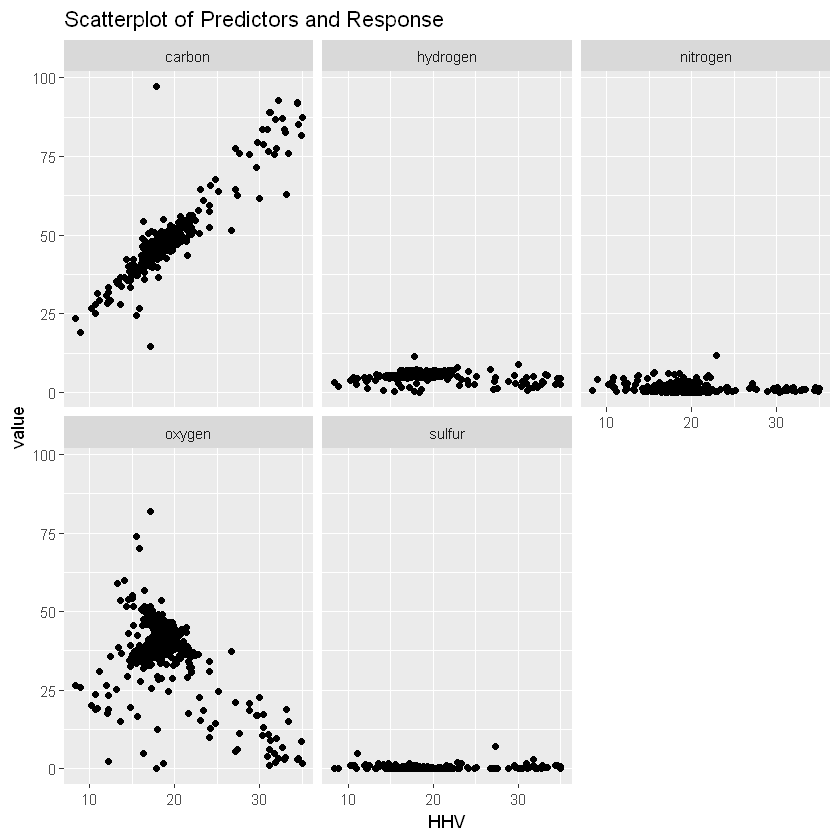

In [107]:
biomass[,3:8] %>%
  pivot_longer(cols = c('carbon','hydrogen','oxygen','nitrogen','sulfur')) %>%
  ggplot(., aes(HHV, value))+
  geom_point()+
  ggtitle('Scatterplot of Predictors and Response')+
  facet_wrap(~name)

Based on the scatterplots we cna see that carbon has a strong positive correlation with HHV, and oxygen a decent negative correlation. This makes sense, as carbon burns to create energy which releases CO2 and H2O. The negative correlation with oxygen is likely due to the fact that the more oxygen levels rise, the less carbon there is. The rest of the gases have no noticeable correlation, but are also on a completely different scale as they are very minor parts of the gaseous makeup.

**HW-2.1.b** 
Split the dataset into an 80-20 training and test sets.

In [108]:
set.seed(100)
indices <- sample(1:nrow(biomass),floor(.8*nrow(biomass)))
train <- biomass[indices,3:8]
test <- biomass[!1:nrow(biomass) %in% indices,3:8]

**HW-2.1.c** 
Use `regsubsets()` to perform **best subset selection** to pick the best model according to $C_p$, BIC, and adjusted $R^2$.

In [109]:
##Fit full model
reg <- regsubsets(HHV ~.,data = biomass[,3:8], method = 'exhaustive')
reg_sum <- summary(reg)


# Find the best model according to Cp
best_model_cp <- which.min(reg_sum$cp)

# Find the best model according to BIC
best_model_bic <- which.min(reg_sum$bic)

# Find the best model according to adjusted R2
best_model_adjr2 <- which.max(reg_sum$adjr2)

# Print the best models according to each criterion
cat("Best model according to Cp:", best_model_cp, "\n",
    "Best model according to BIC:", best_model_bic, "\n",
    "Best model according to adjusted R2:", best_model_adjr2, "\n\n",
    "Model 3:","\n\n")
print(reg_sum$outmat[best_model_cp,])

Best model according to Cp: 3 
 Best model according to BIC: 3 
 Best model according to adjusted R2: 3 

 Model 3: 

  carbon hydrogen   oxygen nitrogen   sulfur 
     "*"      "*"      " "      " "      "*" 


**HW-2.1.d** 
Repeat this procedure for **forward stepwise selection** and **backward stepwise selection**, compare the best models from each selection method.

In [110]:
##Fit full model
forward <- regsubsets(HHV ~.,data = biomass[,3:8], method = 'forward')
forward_sum <- summary(forward)


# Find the best model according to Cp
best_model_forward_cp <- which.min(forward_sum$cp)

# Find the best model according to BIC
best_model_forward_bic <- which.min(forward_sum$bic)

# Find the best model according to adjusted R2
best_model_forward_adjr2 <- which.max(forward_sum$adjr2)

# Print the best models according to each criterion
cat("Best forward selection model according to Cp:", best_model_forward_cp, "\n",
    "Best forward selection model according to BIC:", best_model_forward_bic, "\n",
    "Best forward selection model according to adjusted R2:", best_model_forward_adjr2, "\n\n",
     "Model 3:","\n\n")
print(forward_sum$outmat[best_model_forward_cp,])

Best forward selection model according to Cp: 3 
 Best forward selection model according to BIC: 3 
 Best forward selection model according to adjusted R2: 3 

 Model 3: 

  carbon hydrogen   oxygen nitrogen   sulfur 
     "*"      "*"      " "      " "      "*" 


In [111]:
#Fit full model
backward <- regsubsets(HHV ~.,data = biomass[,3:8], method = 'backward')
backward_sum <- summary(backward)


# Find the best model according to Cp
best_model_backward_cp <- which.min(backward_sum$cp)

# Find the best model according to BIC
best_model_backward_bic <- which.min(backward_sum$bic)

# Find the best model according to adjusted R2
best_model_backward_adjr2 <- which.max(backward_sum$adjr2)
# Print the best models according to each criterion
cat("Best backward selection model according to Cp:", best_model_backward_cp, "\n",
    "Best backward selection model according to BIC:", best_model_backward_bic, "\n",
    "Best backward selection model according to adjusted R2:", best_model_backward_adjr2, "\n\n",
     "Model 3:","\n\n")
print(backward_sum$outmat[best_model_backward_cp,])

Best backward selection model according to Cp: 3 
 Best backward selection model according to BIC: 3 
 Best backward selection model according to adjusted R2: 3 

 Model 3: 

  carbon hydrogen   oxygen nitrogen   sulfur 
     "*"      "*"      " "      " "      "*" 


**HW-2.1.e** 
Use the `predict()` function to investigate the test performance in RMSE using your "best model".

In [112]:
## Using model 3
model <- lm(HHV ~ carbon + hydrogen + sulfur, data = train)
test_pred <- predict(model, test)
cat("RMSE for Model 3:",RMSE(test_pred, test$HHV))

RMSE for Model 3: 1.127256

## HW-2.2: Loan applications
Create your own cross validation algorithm to predict the interest rate for loan applications

Lending club gained fame for being one of the first major players in retail lending. The dataset `lending_club` in the `model_data` package includes 9,857 loans that were provided. Interest rates of loans are often a good indicator of the level of risk associated with lending. If you are likely to pay back a loan, then you will likely be charged lower interest than someone who has a higher chance of default. Your goal is to determine the best model for predicting the interest rate charged to borrowers using best, forward, and backward subset selection within a five-fold cross-validation framework.

Prep steps:
- drop all rows with missing data in the following columns 


**HW-2.2.a** 
Create a correlation plot of all the numeric variables in the dataset using the `corrplot` package to create a high quality graph, then comment on your findings

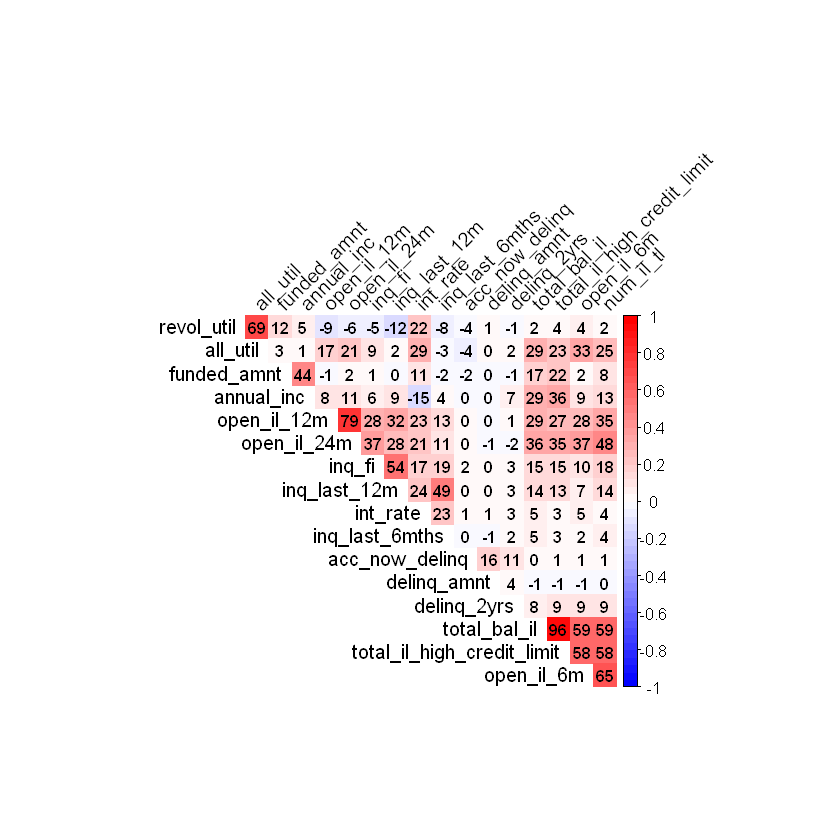

In [113]:
lending_club %>%
  select_if(is.numeric) %>%
  cor() %>%
  corrplot(., method = "color", type = "upper", order = "hclust",
            addCoef.col = "black", tl.col="black", tl.srt=45, addCoefasPercent = T,
           diag = F, number.cex = 0.8, col = colorRampPalette(c("blue",'white','red'))(50))

What we see in the correlation plot is a number of positive correlations. In the bottom right we see that total balance is correlated with credit limit, the number of accounts opened in the last 6 months, and the number of loans. Revolving utilization is correlated with all utilization which makes sense as the higher amount of credit utilization one loan has directly contributed to the total utilization. Delinquency in the last 12 months is positively correlated with interest rate as well because interest rate scales with loan risk.

**HW-2.2.b** 
Run best, forward, and backward subset selection on the entire dataset comment on the findings

In [114]:
lending_club <- lending_club %>% select_if(is.numeric)

In [115]:
# Running best selection
##Fit full model
reg <- regsubsets(int_rate ~.,data = lending_club, method = 'exhaustive', nvmax = 16)
reg_sum <- summary(reg)


# Find the best model according to Cp
best_model_cp <- which.min(reg_sum$cp)

# Find the best model according to BIC
best_model_bic <- which.min(reg_sum$bic)

# Find the best model according to adjusted R2
best_model_adjr2 <- which.max(reg_sum$adjr2)

# Print the best models according to each criterion
cat("Best model according to Cp:", best_model_cp, "\n",
    "Best model according to BIC:", best_model_bic, "\n",
    "Best model according to adjusted R2:", best_model_adjr2, "\n")

Best model according to Cp: 12 
 Best model according to BIC: 10 
 Best model according to adjusted R2: 14 


In [116]:
## Forward selection
##Fit full model
forward <- regsubsets(int_rate ~.,data = lending_club, method = 'forward', nvmax = 16)
forward_sum <- summary(forward)


# Find the best model according to Cp
best_model_forward_cp <- which.min(forward_sum$cp)

# Find the best model according to BIC
best_model_forward_bic <- which.min(forward_sum$bic)

# Find the best model according to adjusted R2
best_model_forward_adjr2 <- which.max(forward_sum$adjr2)

# Print the best models according to each criterion
cat("Best forward selection model according to Cp:", best_model_forward_cp, "\n",
    "Best forward selection model according to BIC:", best_model_forward_bic, "\n",
    "Best forward selection model according to adjusted R2:", best_model_forward_adjr2, "\n")

Best forward selection model according to Cp: 12 
 Best forward selection model according to BIC: 10 
 Best forward selection model according to adjusted R2: 14 


In [117]:
## Backward selection
#Fit full model
backward <- regsubsets(int_rate ~.,data = lending_club, method = 'backward', nvmax = 16)
backward_sum <- summary(backward)


# Find the best model according to Cp
best_model_backward_cp <- which.min(backward_sum$cp)

# Find the best model according to BIC
best_model_backward_bic <- which.min(backward_sum$bic)

# Find the best model according to adjusted R2
best_model_backward_adjr2 <- which.max(backward_sum$adjr2)
# Print the best models according to each criterion
cat("Best backward selection model according to Cp:", best_model_backward_cp, "\n",
    "Best backward selection model according to BIC:", best_model_backward_bic, "\n",
    "Best backward selection model according to adjusted R2:", best_model_backward_adjr2, "\n")

Best backward selection model according to Cp: 12 
 Best backward selection model according to BIC: 10 
 Best backward selection model according to adjusted R2: 14 


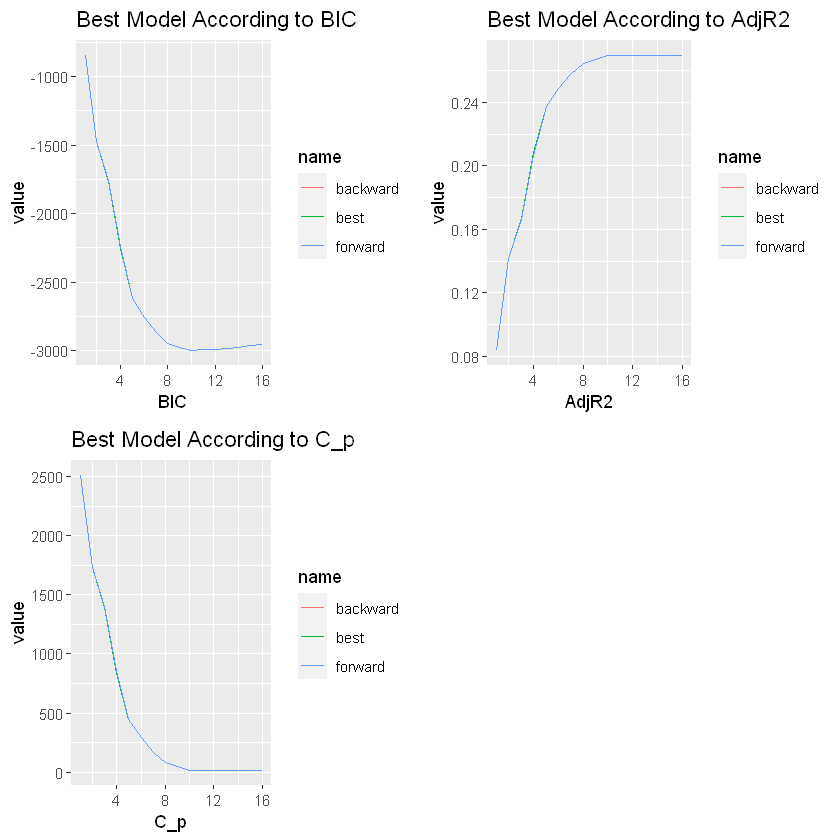

In [118]:
## RESULTS SUMMARY
bic <- data.frame(model = 1:length(forward_sum$bic), forward = forward_sum$bic, backward = backward_sum$bic, best = reg_sum$bic)
r2 <- data.frame(model = 1:length(forward_sum$adjr2), forward = forward_sum$adjr2, backward = backward_sum$adjr2, best = reg_sum$adjr2)
cp <- data.frame(model = 1:length(forward_sum$cp),forward = forward_sum$cp, backward = backward_sum$cp, best = reg_sum$cp)

bic_fig <- 
  bic %>% 
  pivot_longer(cols = c('forward','backward','best'))%>%
  ggplot(., aes(model, value, color = name))+
  geom_line()+
  ggtitle('Best Model According to BIC')+
  xlab('BIC')

r2_fig <- 
  r2 %>% 
  pivot_longer(cols = c('forward','backward','best'))%>%
  ggplot(., aes(model, value, color = name))+
  geom_line()+
  ggtitle('Best Model According to AdjR2')+
  xlab('AdjR2')

cp_fig <- 
  cp %>% 
  pivot_longer(cols = c('forward','backward','best'))%>%
  ggplot(., aes(model, value, color = name))+
  geom_line()+
  ggtitle('Best Model According to C_p')+
  xlab('C_p')
               
gridExtra::grid.arrange(bic_fig, r2_fig, cp_fig, ncol = 2)


All of the metrics appear to converge to local minima or maxima around model 8 and stay at the low thereafter. Models 10,12, and 14 all show up as optimal model choices accoriding to BIC and Adj R2 in best subset, forward, and backward subset selection, so these 3 will be used going forward.

In [119]:
print("Model 10 coeffs:")
print(coef(backward, id = 10))
cat("\n", "Model 12 coeffs:", "\n")
print(coef(backward, id = 12))
cat("\n", "Model 14 coeffs:", "\n")
print(coef(backward, id = 14))


[1] "Model 10 coeffs:"
   (Intercept)    funded_amnt     annual_inc    delinq_2yrs inq_last_6mths 
  7.050072e+00   1.282613e-04  -2.608184e-05   2.659949e-01   9.424299e-01 
    revol_util    open_il_12m    open_il_24m       all_util   inq_last_12m 
  2.540247e-02   6.351357e-01   2.877182e-01   4.518823e-02   2.772290e-01 
     num_il_tl 
 -7.622531e-02 

 Model 12 coeffs: 
   (Intercept)    funded_amnt     annual_inc    delinq_2yrs inq_last_6mths 
  7.002644e+00   1.280349e-04  -2.599217e-05   2.587385e-01   9.452911e-01 
    revol_util acc_now_delinq     open_il_6m    open_il_12m    open_il_24m 
  2.448738e-02   1.030257e+00  -4.141879e-02   6.331772e-01   2.906753e-01 
      all_util   inq_last_12m      num_il_tl 
  4.725760e-02   2.746584e-01  -6.733086e-02 

 Model 14 coeffs: 
   (Intercept)    funded_amnt     annual_inc    delinq_2yrs inq_last_6mths 
  7.051213e+00   1.274567e-04  -2.624692e-05   2.564677e-01   9.517292e-01 
    revol_util acc_now_delinq     open_il_6m    open_

**HW-2.2.c** 
Create a five-fold cross-validation algorithm using for loops to compare the CV mse performance of your best two models

In [120]:
## CV algorithm
CV <- function(data, k = 5){
  cutoff <- floor(nrow(data)/k)
  mse_model1 <- c()
  mse_model2 <- c()
  mse_model3 <- c()
  for (i in 1:k){
    start <- 1 + ((i-1) * cutoff)
    stop <- start + cutoff+1
    train <- data[!1:nrow(data) %in% start:stop,]
    test <- data[start:stop,]
    model1 <- lm(int_rate ~ 
                funded_amnt + annual_inc + delinq_2yrs + inq_last_6mths + revol_util + open_il_12m + open_il_24m + all_util + inq_last_12m + num_il_tl, 
                data = train)
    model2 <- lm(int_rate ~
                funded_amnt + annual_inc + delinq_2yrs + inq_last_6mths + revol_util + acc_now_delinq + open_il_6m + open_il_12m + open_il_24m + all_util + inq_last_12m + num_il_tl,
                 data = train)
    model3 <- lm(int_rate ~ 
                  funded_amnt + annual_inc + delinq_2yrs + inq_last_6mths + revol_util + acc_now_delinq + open_il_6m + open_il_12m + open_il_24m + total_bal_il + inq_fi + all_util + inq_last_12m + num_il_tl,
                  data = train)
    predict1 <- predict(model1, test)
    predict2 <- predict(model2, test)
    predict3 <- predict(model3, test)
    mse_model1 <- c(mse_model1, RMSE(predict1, test$int_rate)**2)
    mse_model2 <- c(mse_model2, RMSE(predict2, test$int_rate)**2)
    mse_model3 <- c(mse_model3, RMSE(predict3, test$int_rate)**2)
  }
  return(c("Model 10 MSE" = round(mean(mse_model1),4), "Model 12 MSE" = round(mean(mse_model2),4), "Model 14 MSE" = round(mean(mse_model3),4)))
}

In [121]:
CV(lending_club)

Model 10 MSE Model 12 MSE Model 14 MSE 
     17.5569      17.5526      17.5500

The models perform pretty poorly with MSE's well over what we were looking for. For context this would place the average miss about 4% off of what the actual interest rate was, a very sizable margin. The best model according to MSE is model 14.

## HW-2.3: k-fold cross-validation

Properties of k-fold cross validation

Suppose we are given a training set with `n` observations and want to conduct `k`-fold cross-validation. Assume always that `n = km` where `m` is an integer.

**HW-2.3.a** Let k = 2. Explain carefully why there are $\frac{1}{2}\left(\begin{array}{c}
n \\
m
\end{array}\right)$  ways to partition the data into 2 folds. 2m

$\left(\begin{array}{c}
n \\
m
\end{array}\right)$  represents the number of combinations that can arise from choosing m items from n items. The reason why we must divide this by 2 to determine how many ways we can partition into 2 folds, is to avoid overcounting. For instance, we can choose m items for fold A and the rest of the n items for B, but this formula also accounts for those same m items being in fold B and the rest in fold A. For our case, we only care about the number of unique fold combinations, not which data points are in which fold. Thus we divide by 2 to remove the cases accounting for the swaps.


**HW-2.3.b** Let `k` = 3. Explain carefully why there are $\frac{n!}{3!m!m!m!}$ ways to partition the data into 3 folds.

The number of ways to select m items from n items is given by $\binom{n}{m}$. Once we have chosen the m items to go in Fold A, the remaining n - m items will go into two folds, Fold B and Fold C.

The remaining n - m items can be partitioned into two sets of size (n - m)/2 each to put in Fold B and Fold C respectively. The number of ways to choose (n - m)/2 items from n - m items is given by  $\binom{n-m}{(n-m)/2}$.

However, since the order in which we put the items in each fold does not matter, we need to divide the total number of ways to partition the data by the number of equivalent arrangements. There are 3! possible equivalent arrangements because we can arrange the three folds in 3! different ways. Therefore, the total number of ways to partition the data into three folds is:

$\frac{1}{3!}\binom{n}{m}\binom{n-m}{(n-m)/2}\binom{n-m}{(n-m)/2}$

Simplifying, we have:

$\frac{n!}{3!m!m!m!}$

**HW-2.3.c**
Guess a formula for the number of ways to partition the data into `k` folds for general `k`. Check if your formula gives the correct answer for `k=n` (leave-one-out c.v.).

We have to select k sets of size m which we can do by 
$\frac{n!}{(m!)^k}$

This equation does not account for equivalent arrangements, if it did we would divide this number by k!

Using this equation we can substitute k = n and get $\frac{n!}{(1!)^n} = n!$. This represents the number of ways to partition the data in LOOCV. However, if we only want to look at non-equivalent arrangements then we divide by k! which in this case is n! which would give $\frac{n!}{n!} = 1$ which represents the number of meaningful ways to split the data for LOOCV. The difference comes from if we care if about the difference between splitting a 100 row dataset into 1:99 and 100 or 2:100 and 1 or 1,3:100 and 2 to start vs recognizing that the order in which we create is equivalent as long as you get to every set.


## HW-2.4: Advertising budget

Using cross-validation to select best advertising budget

In this problem, we use the Advertising data [download here](https://www.statlearning.com/s/Advertising.csv). We want to predict Sales from TV, Radio and Newspaper, using multiple regression with all three predictors plus up to one interaction term of these three predictors, e.g. TV * Radio or Radio * Newspaper. 

**HW-2.4.a** 
Should such an interaction term be included? Which one? Try to answer this question by estimating the residual standard error using 10-fold cross validation for all four possible models.

In [122]:
df <- read_csv('https://www.statlearning.com/s/Advertising.csv')
print(dim(df))
head(df)

New names:
• `` -> `...1`
Rows: 200 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (5): ...1, TV, radio, newspaper, sales

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 200   5


...1,TV,radio,newspaper,sales
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2


In [123]:
CV_ads <- function(data, k = 10){
  cutoff <- floor(nrow(data)/k)
  mse_na <- c()
  mse_tvrad <- c()
  mse_tvnews <- c()
  mse_radnews <- c()
  for (i in 1:k){
    start <- 1 + ((i-1) * cutoff)
    stop <- start + cutoff - 1
    train <- data[!1:nrow(data) %in% start:stop,]
    test <- data[start:stop,]
    model_na <- lm(sales ~ TV + radio + newspaper, data = train)
    model_tvrad <- lm(sales ~ TV + radio + newspaper + TV*radio, data = train)
    model_tvnews <- lm(sales ~ TV + radio + newspaper + TV*newspaper, data = train)
    model_radnews <- lm(sales ~ TV + radio + newspaper + radio*newspaper, data = train)
    predict_na <- predict(model_na, test)
    predict_tvrad <- predict(model_tvrad, test)
    predict_tvnews <- predict(model_tvnews, test)
    predict_radnews <- predict(model_radnews, test)
    mse_na<- c(mse_na, RMSE(predict_na, test$sales)**2)
    mse_tvrad<- c(mse_tvrad, RMSE(predict_tvrad, test$sales)**2)
    mse_tvnews<- c(mse_tvnews, RMSE(predict_tvnews, test$sales)**2)
    mse_radnews<- c(mse_radnews, RMSE(predict_radnews, test$sales)**2)
  }
  return(c("Model No Interactions" = round(mean(mse_na),2), "Model with TV*Radio Interaction" = round(mean(mse_tvrad),2), "Model with TV*Newspaper Interaction" = round(mean(mse_tvnews),2),
  "Model with Radio*Newspaper Interaction" = round(mean(mse_radnews),2)))
}

In [124]:
CV_ads(df)

Model No Interactions        Model with TV*Radio Interaction 
                                  3.06                                   0.96 
   Model with TV*Newspaper Interaction Model with Radio*Newspaper Interaction 
                                  3.00                                   3.12

Based on these results, it is clear that the best model of the 4 is the one with the 3 predictors plus an interaction term between TV*Radio which is the only one with a 10-fold CV MSE below 1.

**HW-2.4.b** 
Create a single plot showing the return on investment of each advertising method where the y-axis is `Sales` and the x-axis is advertising dollars. There should be three lines, one for each method. The slope is the coefficient from you regression. What is the best advertising method to invest in based on return on investment?

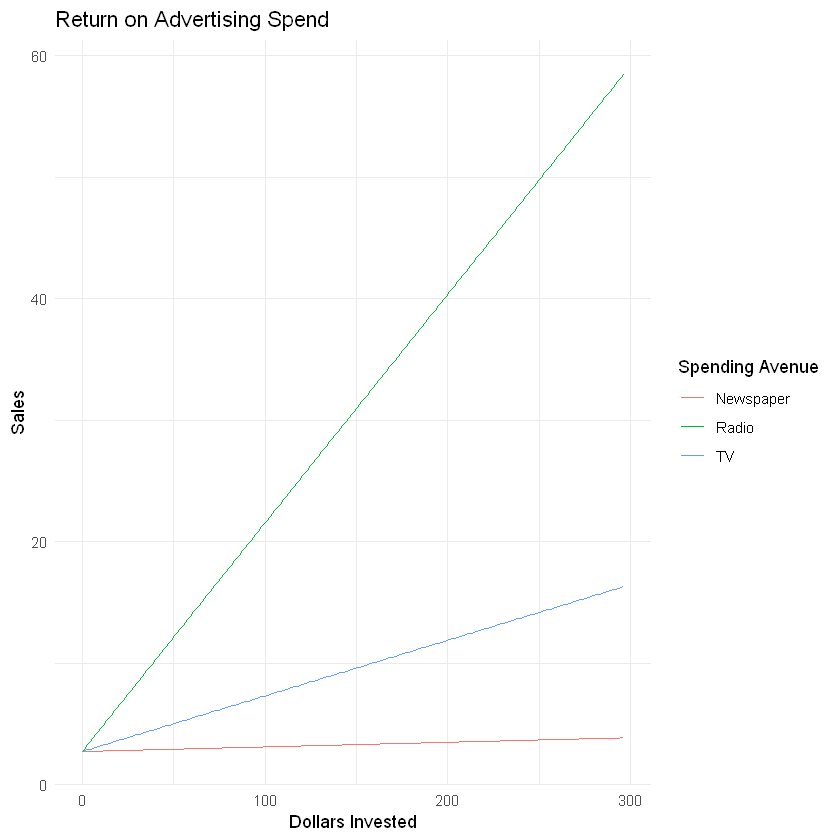

In [125]:
## Split data into test and train 
set.seed(100)
indices <- sample(1:nrow(df),floor(.8*nrow(df)))
train <- df[indices,]
test <- df[!1:nrow(df) %in% indices,]

## Run a linear model with no interactions to get raw returns
model <- lm(sales ~ TV + radio + newspaper, data = train)
coeffs <- coef(model)

## Filling in the data
Dollars <- seq(min(df), max(df), length.out = 200)
TV <- Dollars * coeffs[[2]] + coeffs[[1]]
Radio <- Dollars * coeffs[[3]] + coeffs[[1]]
Newspaper <- Dollars * coeffs[[4]] + coeffs[[1]]
return <- data.frame(Dollars,TV, Radio, Newspaper)

## Making graph
return %>% 
pivot_longer(cols = c(TV, Radio, Newspaper), names_to= "Spending Avenue")%>%
ggplot(., aes(Dollars, value, color = `Spending Avenue`))+
geom_line()+
ggtitle('Return on Advertising Spend')+
xlab('Dollars Invested')+
ylab('Sales')+
theme_minimal()



The best method to invest in based on ROI is Radio, then TV, and lastly Newspaper. Based on the data however, none of these methods are ROI positive, consuming more money on the marketing side then the returns they generate through sales. Newspaper is clearly the worst form of marketing and should not be utilized. Radio and TV both work with radio being superior, and given the interaction between them, these avenues seem to be the best to pursue with emphasis on radio.

## HW-2.5: ISLR-6.8 #8(a-d)

#### Part-A

In [126]:
## Using rnorm() to generate X of length 100 and a noise vector E 
set.seed(10)
X <- rnorm(100)
E <- rnorm(100)

#### Part-B

In [127]:
## Generating Y according to a model of the form Y = B0 + B1X + B2X^2 + B3X^3 + E
# Establishing coeffs of my choice
B0 <- 1
B1 <- 2
B2 <- 3
B3 <- 4
Y <- B0 + B1*X + B2*X**2 + B3*X**3 + E

#### Part-C

In [128]:
## Use regsubsets to do subset selection containing predictors X..X^10

## Create dataframe 
xy <- data.frame(X, Y)

## Fit model
reg <- regsubsets(Y ~ poly(X,10, raw = T), data = xy, nvmax = 10, method = 'exhaustive')
reg.sum <- summary(reg)

In [129]:
## Getting model critieria
# Find the best model according to Cp
best_model_cp <- which.min(reg.sum$cp)

# Find the best model according to BIC
best_model_bic <- which.min(reg.sum$bic)

# Find the best model according to adjusted R2
best_model_adjr2 <- which.max(reg.sum$adjr2)

# Print the best models according to each criterion
cat("Best model according to Cp:", best_model_cp, "\n",
    "Best model according to BIC:", best_model_bic, "\n",
    "Best model according to adjusted R2:", best_model_adjr2, "\n")

Best model according to Cp: 3 
 Best model according to BIC: 3 
 Best model according to adjusted R2: 3 


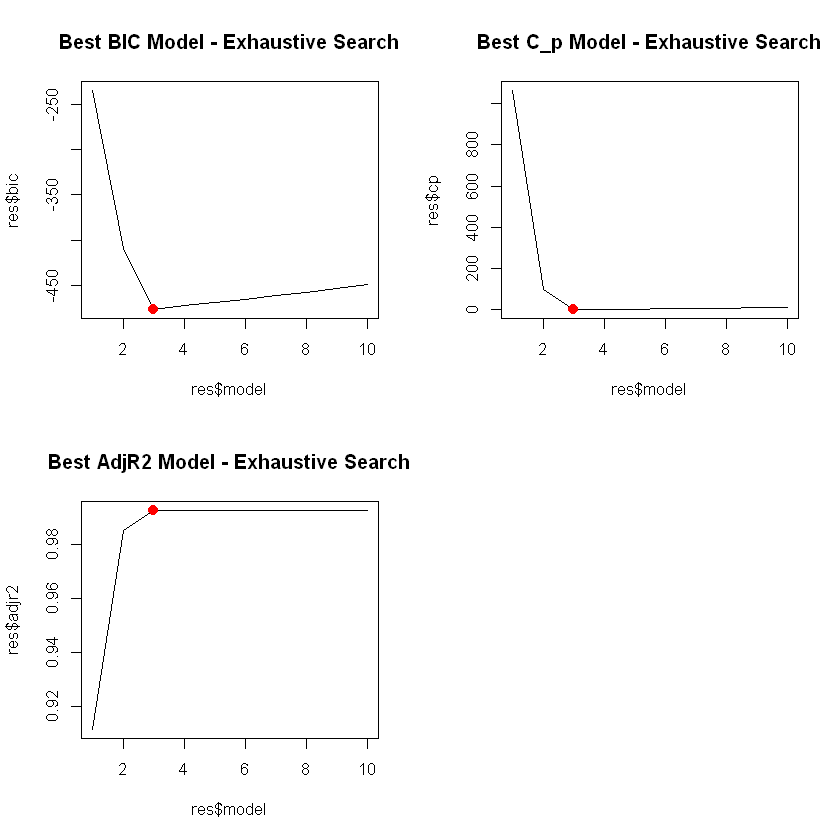

In [130]:
## Plotting the criteria
res <- data.frame(model = 1:length(reg.sum$bic), bic = reg.sum$bic, cp = reg.sum$cp, adjr2 = reg.sum$adjr2)
par(mfrow = c(2,2))
plot(res$model, res$bic, main = "Best BIC Model - Exhaustive Search", type = 'l')
points(best_model_bic, min(res$bic), col = 'red',cex=2,pch=20)
plot(res$model, res$cp, main = "Best C_p Model - Exhaustive Search", type = 'l')
points(best_model_cp, min(res$cp), col = 'red',cex=2,pch=20)
plot(res$model, res$adjr2, main = "Best AdjR2 Model - Exhaustive Search", type = 'l')
points(best_model_adjr2, max(res$adjr2), col = 'red',cex=2,pch=20)


In [131]:
## Coefficients for the best models
print(coef(reg, id = 3))

          (Intercept) poly(X, 10, raw = T)1 poly(X, 10, raw = T)2 
            0.9289736             1.8842119             2.9636219 
poly(X, 10, raw = T)3 
            4.0211132 


Model 3 was chosen as the best models by BIC, C_p and AdjR2. The model maps decently well to the coefficients I had assigned (1,2,3,4) and this returned the exact same variables using only $X^1$ - $X^3$.

#### Part-D: 

#### Forward selection

In [132]:
## Fit model
reg_f <- regsubsets(Y ~ poly(X,10, raw = T), data = xy, nvmax = 10, method = 'forward')
reg_f.sum <- summary(reg_f)

## Getting model critieria
# Find the best model according to Cp
best_model_f_cp <- which.min(reg_f.sum$cp)

# Find the best model according to BIC
best_model_f_bic <- which.min(reg_f.sum$bic)

# Find the best model according to adjusted R2
best_model_f_adjr2 <- which.max(reg_f.sum$adjr2)

# Print the best models according to each criterion
cat("Best model according to Cp:", best_model_f_cp, "\n",
    "Best model according to BIC:", best_model_f_bic, "\n",
    "Best model according to adjusted R2:", best_model_f_adjr2, "\n")

Best model according to Cp: 3 
 Best model according to BIC: 3 
 Best model according to adjusted R2: 3 


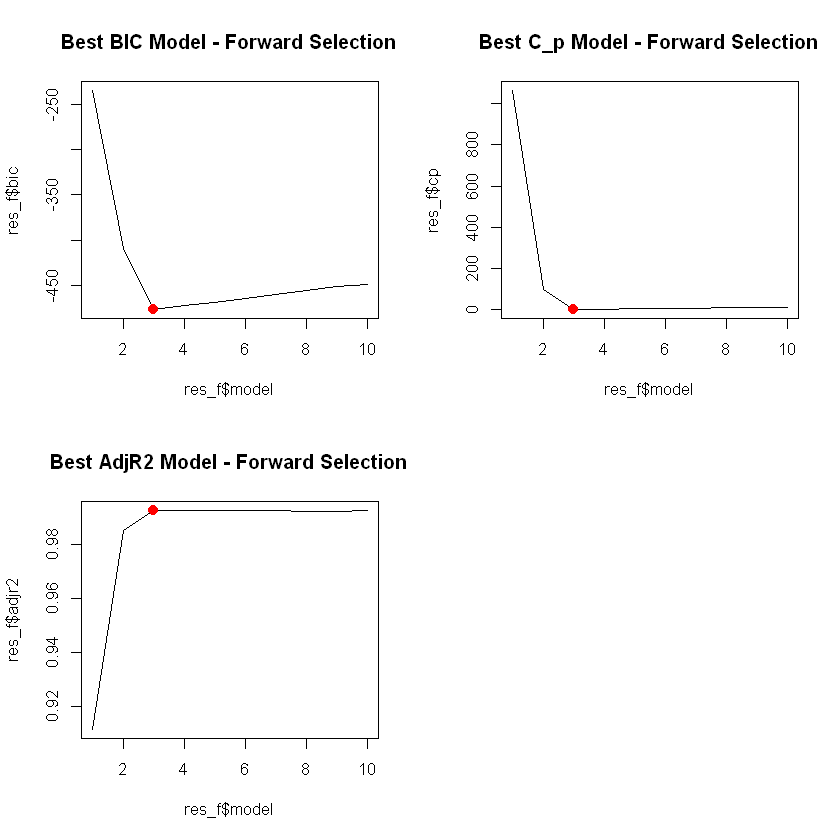

In [133]:
## Plotting the criteria
res_f <- data.frame(model = 1:length(reg_f.sum$bic), bic = reg_f.sum$bic, cp = reg_f.sum$cp, adjr2 = reg_f.sum$adjr2)
par(mfrow = c(2,2))
plot(res_f$model, res_f$bic, main = "Best BIC Model - Forward Selection", type = 'l')
points(best_model_f_bic, min(res_f$bic), col = 'red',cex=2,pch=20)
plot(res_f$model, res_f$cp, main = "Best C_p Model - Forward Selection", type = 'l')
points(best_model_f_cp, min(res_f$cp), col = 'red',cex=2,pch=20)
plot(res_f$model, res_f$adjr2, main = "Best AdjR2 Model - Forward Selection", type = 'l')
points(best_model_f_adjr2, max(res_f$adjr2), col = 'red',cex=2,pch=20)

#### Backward selection

In [134]:
## Fit model
reg_b <- regsubsets(Y ~ poly(X,10, raw = T), data = xy, nvmax = 10, method = 'backward')
reg_b.sum <- summary(reg_b)

## Getting model critieria
# Find the best model according to Cp
best_model_b_cp <- which.min(reg_b.sum$cp)

# Find the best model according to BIC
best_model_b_bic <- which.min(reg_b.sum$bic)

# Find the best model according to adjusted R2
best_model_b_adjr2 <- which.max(reg_b.sum$adjr2)

# Print the best models according to each criterion
cat("Best model according to Cp:", best_model_b_cp, "\n",
    "Best model according to BIC:", best_model_b_bic, "\n",
    "Best model according to adjusted R2:", best_model_b_adjr2, "\n")

Best model according to Cp: 5 
 Best model according to BIC: 5 
 Best model according to adjusted R2: 5 


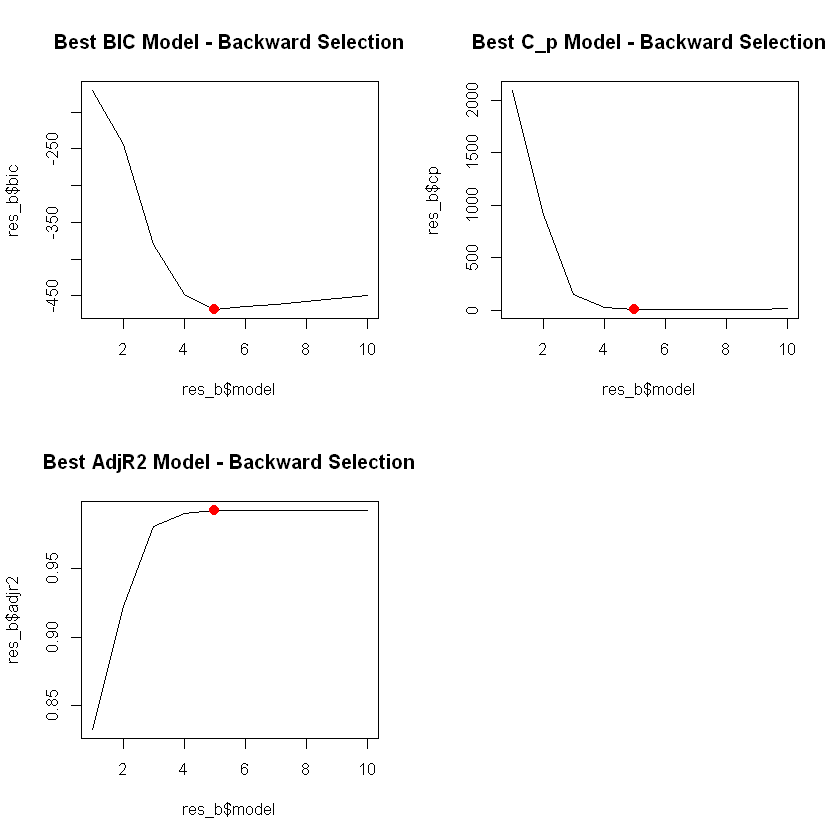

In [135]:
## Plotting the criteria
res_b <- data.frame(model = 1:length(reg_b.sum$bic), bic = reg_b.sum$bic, cp = reg_b.sum$cp, adjr2 = reg_b.sum$adjr2)
par(mfrow = c(2,2))
plot(res_b$model, res_b$bic, main = "Best BIC Model - Backward Selection", type = 'l')
points(best_model_b_bic, min(res_b$bic), col = 'red',cex=2,pch=20)
plot(res_b$model, res_b$cp, main = "Best C_p Model - Backward Selection", type = 'l')
points(best_model_b_cp, min(res_b$cp), col = 'red',cex=2,pch=20)
plot(res_b$model, res_b$adjr2, main = "Best AdjR2 Model - Backward Selection", type = 'l')
points(best_model_b_adjr2, max(res$adjr2), col = 'red',cex=2,pch=20)

The answers from backward selection differ from both forward and exhaustive search, indicating that model 5 should be examined according to all the metrics. Forward selection concurred with exhaustive search in saying that model 3 was the best choice. So now models 3 and 5 would be candidates to try in a CV paradigm.

In [136]:
print(coef(reg_b, id = 5))

          (Intercept) poly(X, 10, raw = T)1 poly(X, 10, raw = T)2 
            0.9818936             3.1379841             2.9222014 
poly(X, 10, raw = T)5 poly(X, 10, raw = T)7 poly(X, 10, raw = T)9 
            3.4159195            -1.0536412             0.1054919 


In [137]:
## Running CV to determine best model
CV_ <- function(data, k = 5){
  cutoff <- floor(nrow(data)/k)
  mse_3 <- c()
  mse_5 <- c()
  pred_3 <- c()
  actual <- c()
  for (i in 1:k){
    start <- 1 + ((i-1) * cutoff)
    stop <- start + cutoff - 1
    train <- data[!1:nrow(data) %in% start:stop,]
    test <- data[start:stop,]
    model_3 <- lm(Y ~ poly(X,10, raw = T)[,c(1,2,3)], data = train)
    model_5 <- lm(Y ~ poly(X,10, raw = T)[,c(1,2,5,7,9)], data = train)
    predict_3 <- predict(model_3, test)
    predict_5 <- predict(model_5, test)
    mse_3<- c(mse_3, RMSE(predict_3, test$Y))
    mse_5<- c(mse_5, RMSE(predict_5, test$Y))
    pred_3 <- c(pred_3, predict_3)
    actual <- c(actual, test$Y)
  }
  return(c("Model 3" = round(mean(mse_3),2), "Model 5" = round(mean(mse_5),2), pred_3, actual))
}
r <- CV_(xy)
r[1:2]

Model 3 Model 5 
   0.99    1.01

Based on these results, model 3 does perform the best, which is what was suggested by both exhaustive search and forward selection. As mentioned above its parameters are also in strong agreement with the intial parameters I set which would be unknown in a normal process, but here it is a good sanity check. Below is a plot mapping the predictions to the actual values, which shows strong postive correlation.

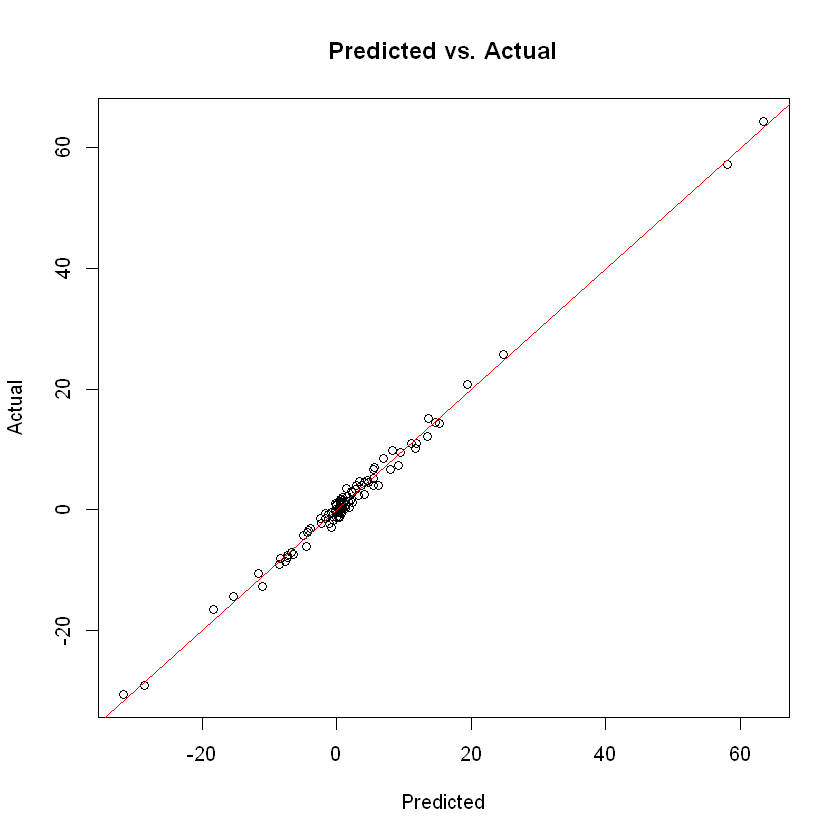

In [138]:
pred <- r[3:102]
actual <- r[103:length(r)]
plot(pred, actual, xlab = "Predicted", ylab = "Actual", main = "Predicted vs. Actual")
abline(lm(pred~actual), col = "red")